<a href="https://colab.research.google.com/github/aquapathos/TFLesson/blob/master/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v1 as tf
# import tensorflow as tf

XSIZE = 192
YSIZE = 192
MINSPAN = 4 # 格子点間隔

In [0]:
# 巡回する点を生成する関数
def genTSP(pnum = 1):
  tspimg = np.zeros((YSIZE,XSIZE),np.uint8)
  posnumA = np.random.randint(0,(XSIZE-MINSPAN)//MINSPAN*(YSIZE-MINSPAN)//MINSPAN,pnum)  
  posnumA = np.unique(posnumA)
  posA = []
  for i,n in enumerate(posnumA):
    y = MINSPAN*(n//((XSIZE-MINSPAN)//MINSPAN))+MINSPAN//2
    x = MINSPAN*(n%((XSIZE-MINSPAN)//MINSPAN))+MINSPAN//2
    posA.append([x,y])
    cv2.rectangle(tspimg,(posA[i][0]-1,posA[i][1]-1),(posA[i][0]+1,posA[i][1]+1),255,-1)
  return posA, tspimg

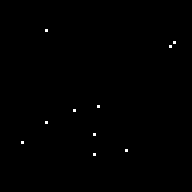

In [0]:
ret, img = genTSP(10)
cv2_imshow(img)

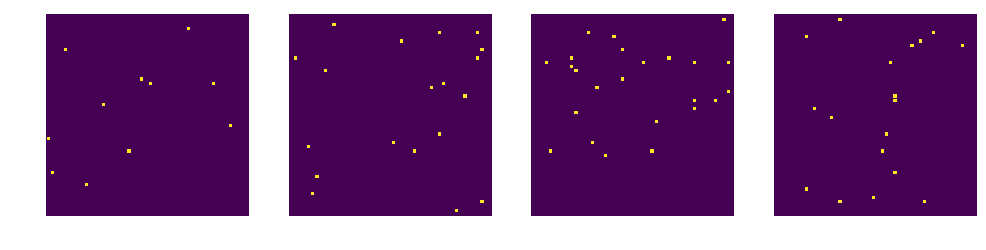

In [0]:
plt.figure(figsize=(12, 6), dpi=100)
for i in range(4):
    plt.subplot(1, 4, i+1)
    ret, img = genTSP(np.random.randint(10,25))
    plt.imshow(img)
    plt.axis('off')

https://github.com/jvkersch/pyconcorde

In [0]:
!git clone https://github.com/jvkersch/pyconcorde
% cd pyconcorde
!pip install -e .

Cloning into 'pyconcorde'...
remote: Enumerating objects: 195, done.
remote: Total 195 (delta 0), reused 0 (delta 0), pack-reused 195
Receiving objects: 100% (195/195), 108.28 KiB | 9.02 MiB/s, done.
Resolving deltas: 100% (102/102), done.
/content/pyconcorde
Obtaining file:///content/pyconcorde
  Running setup.py develop for pyconcorde


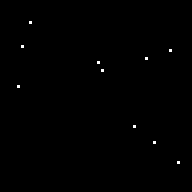

In [0]:
from concorde.tsp import TSPSolver
from concorde.tests.data_utils import get_dataset_path

data, img = genTSP(10)
cv2_imshow(img)
xs = [x for [x,y] in data]
ys = [y for [x,y] in data]
solver = TSPSolver.from_data(xs,ys,norm="EUC_2D")


[0 1 6 7 8 9 2 3 5 4] tour length 516.0


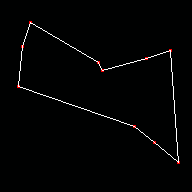

In [0]:
solution = solver.solve()
color = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
color = color - np.array([255,255,0],np.uint8)
ps = solution.tour
cv2.line(color,(xs[ps[0]],ys[ps[0]]),(xs[ps[-1]],ys[ps[-1]]),(255,255,255),1)
p0 = ps[0]
for p1 in ps[1:]:
  color = cv2.line(color,(xs[p0],ys[p0]),(xs[p1],ys[p1]),(255,255,255),1)
  p0 = p1
print(solution.tour, "tour length",solution.optimal_value)
cv2_imshow(color)

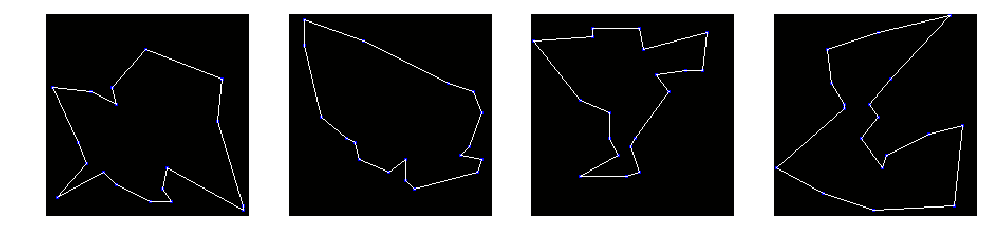

In [0]:
plt.figure(figsize=(12, 6), dpi=100)
for i in range(4):
    plt.subplot(1, 4, i+1)
    data, img = genTSP(np.random.randint(10,25))
    xs = [x for [x,y] in data]
    ys = [y for [x,y] in data]
    solver = TSPSolver.from_data(xs,ys,norm="EUC_2D")
    solution = solver.solve()
    color = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    color = color - np.array([255,255,0],np.uint8)
    ps = solution.tour
    cv2.line(color,(xs[ps[0]],ys[ps[0]]),(xs[ps[-1]],ys[ps[-1]]),(255,255,255),1)
    p0 = ps[0]
    for p1 in ps[1:]:
      color = cv2.line(color,(xs[p0],ys[p0]),(xs[p1],ys[p1]),(255,255,255),1)
      p0 = p1
    plt.imshow(color)
    plt.axis('off')

# 基礎実験
- 48ｘ48サイズのエリアで10～25の訪問先をランダムに生成（格子間隔４）
- 200 の TSP 問題を生成

In [0]:
XSIZE = 48
YSIZE = 48
MINSPAN = 4 # 格子点間隔

# サンプル

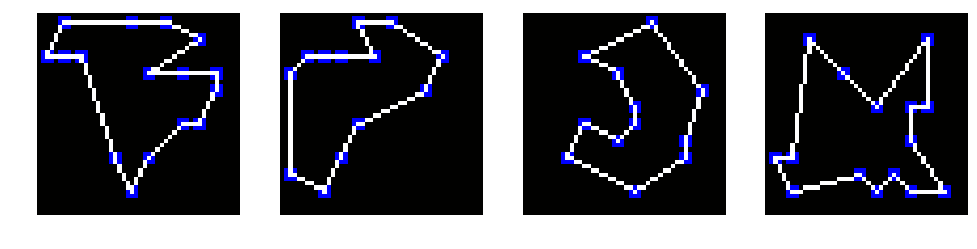

In [0]:
plt.figure(figsize=(12, 6), dpi=100)
for i in range(4):
    plt.subplot(1, 4, i+1)
    data, img = genTSP(np.random.randint(10,25))
    xs = [x for [x,y] in data]
    ys = [y for [x,y] in data]
    solver = TSPSolver.from_data(xs,ys,norm="EUC_2D")
    solution = solver.solve()
    color = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    color = color - np.array([255,255,0],np.uint8)
    ps = solution.tour
    cv2.line(color,(xs[ps[0]],ys[ps[0]]),(xs[ps[-1]],ys[ps[-1]]),(255,255,255),1)
    p0 = ps[0]
    for p1 in ps[1:]:
      color = cv2.line(color,(xs[p0],ys[p0]),(xs[p1],ys[p1]),(255,255,255),1)
      p0 = p1
    plt.imshow(color)
    plt.axis('off')

# 学習用データの生成
200の問題を生成
- X：入力の配列
- Y：理想解の配列

In [0]:
X,Y = [],[]
for i in range(200):
    data, img = genTSP(np.random.randint(10,25))
    X.append(img)
    xs = [x for [x,y] in data]
    ys = [y for [x,y] in data]
    solver = TSPSolver.from_data(xs,ys,norm="EUC_2D")
    solution = solver.solve()
    simg = img.copy()
    ps = solution.tour
    cv2.line(simg,(xs[ps[0]],ys[ps[0]]),(xs[ps[-1]],ys[ps[-1]]),255,1)
    p0 = ps[0]
    for p1 in ps[1:]:
      color = cv2.line(simg,(xs[p0],ys[p0]),(xs[p1],ys[p1]),255,1)
      p0 = p1
    Y.append(simg)

# 確認
200のうちの先頭50個だけ表示してみる

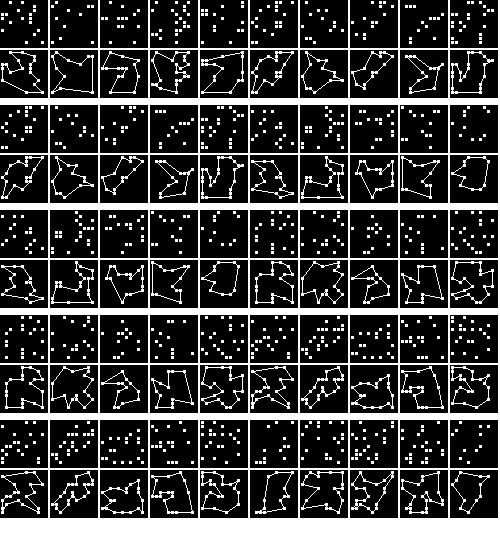

<Figure size 1200x600 with 0 Axes>

In [0]:
plt.figure(figsize=(12, 6), dpi=100)
simg = np.ones((550,500),np.uint8)*255
for i in range(5):
  for j in range(10):
    simg[105*i:105*i+48,50*j:50*j+48] = X[5*i+j]
    simg[105*i+50:105*i+98,50*j:50*j+48] = Y[5*i+j]
cv2_imshow(simg)

# データの水増し
[[1, 2, 3],  
 [4, 5, 6],   
 [7, 8, 9]])  
- flip axis=0 上下反転  
[[7 8 9]  
 [4 5 6]  
 [1 2 3]]  
- flip axis=1 左右反転  
[[3 2 1]  
 [6 5 4]  
 [9 8 7]]  
- flip axis=None  
[[9 8 7]  
 [6 5 4]  
 [3 2 1]]  
- rot90  k=1 反時計回り90度   
[[3 6 9]  
 [2 5 8]  
 [1 4 7]]  
- rot90 k=1 , flip axis=0  
[[1 4 7]  
 [2 5 8]  
 [3 6 9]]  
- rot90  k=-1  時計回り90度  
[[7 4 1]  
 [8 5 2]  
 [9 6 3]]  
- rot90 k=-1 , flip axis=0  
[[9 6 3]  
 [8 5 2]  
 [7 4 1]]  

- http://pynote.hatenablog.com/entry/numpy-array-manipulation-functions

In [0]:
for i in range(200):
  x,y = X[i],Y[i]
  X.append(np.flip(x,axis=0))
  Y.append(np.flip(y,axis=0))
  X.append(np.flip(x,axis=1))
  Y.append(np.flip(y,axis=1))
  X.append(np.flip(x,axis=None))
  Y.append(np.flip(y,axis=None))
  X.append(np.rot90(x,k=1))
  Y.append(np.rot90(y,k=1))
  X.append(np.flip(X[-1],axis=0))
  Y.append(np.flip(Y[-1],axis=0))
  X.append(np.rot90(x,k=-1))
  Y.append(np.rot90(y,k=-1))    
  X.append(np.flip(X[-1],axis=0))
  Y.append(np.flip(Y[-1],axis=0))

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,UpSampling2D,Conv2DTranspose
import keras.backend.tensorflow_backend as KTF
from keras.callbacks import EarlyStopping, CSVLogger
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam

from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
session = tf. Session ('')     # tensorboardを使うのに必要な設定
KTF.set_session (session)      # tensorboardをわないなら不要
KTF.set_learning_phase (1)     # 

model = Sequential()
model.add(Conv2D(64,kernel_size=(3, 3),padding='same',
                 activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2, 2)),)
model.add(Dropout(rate=0.5))
model.add(Conv2D(64,kernel_size=(3, 3),padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2DTranspose(64, kernel_size=3,  activation='relu', use_bias=False))

model.add(Conv2DTranspose(64, kernel_size=5,  activation='relu', use_bias=False))
model.add(UpSampling2D((2, 2)))
model.add(Conv2DTranspose(64, kernel_size=7,  activation='relu', use_bias=False))
model.add(Conv2DTranspose(32, kernel_size=7,  activation='relu', use_bias=False))
model.add(Conv2DTranspose(1, kernel_size=1,  activation='relu',use_bias=False))


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 64)        36864     
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 18, 18, 64)        102400    
__________

In [0]:
model.compile(loss='mean_squared_error',
              # optimizer = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),
              #optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False),
              metrics=['accuracy'])

In [0]:
batch_size = 100
epochs = 100

X1 = np.array(X).reshape(1600,48*48).astype('float32')
X1 = X1/255
X1 = X1.reshape(-1,48,48,1)
Y1 = np.array(Y).reshape(1600,48*48)
Y1 = Y1/255
Y1 = Y1.reshape(-1,48,48,1)

es = EarlyStopping(monitor='val_loss', patience=2)   #  検証用データのロスが改善されなくなったら2エポック後に停止
tb_cb = keras.callbacks.TensorBoard(log_dir='tblog', histogram_freq=1, write_graph=True)
csv_logger = CSVLogger('training.log')
hist = model.fit(X1, Y1,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.2, # 20 % は検証用に利用する
                 #callbacks=[es, csv_logger,tb_cb])
                  callbacks=[es, csv_logger])

Train on 1280 samples, validate on 320 samples
Epoch 1/100
1280/1280 [==============================] - 1s 584us/step - loss: 0.1015 - acc: 0.8985 - val_loss: 0.0990 - val_acc: 0.9009
Epoch 2/100
1280/1280 [==============================] - 1s 529us/step - loss: 0.1015 - acc: 0.8985 - val_loss: 0.0990 - val_acc: 0.9009
Epoch 3/100
1280/1280 [==============================] - 1s 542us/step - loss: 0.1015 - acc: 0.8985 - val_loss: 0.0990 - val_acc: 0.9009
Epoch 4/100
1280/1280 [==============================] - 1s 539us/step - loss: 0.1014 - acc: 0.8985 - val_loss: 0.0990 - val_acc: 0.9009
Epoch 5/100
1280/1280 [==============================] - 1s 537us/step - loss: 0.1014 - acc: 0.8985 - val_loss: 0.0990 - val_acc: 0.9009
Epoch 6/100
1280/1280 [==============================] - 1s 540us/step - loss: 0.1014 - acc: 0.8985 - val_loss: 0.0990 - val_acc: 0.9009
Epoch 7/100
1280/1280 [==============================] - 1s 537us/step - loss: 0.1014 - acc: 0.8985 - val_loss: 0.0990 - val_acc: 0

In [0]:
def test(i):
    output = model.predict(X1)[i]
    output = np.ndarray.flatten(output)
    output = output.reshape(48,48)
    fig = plt.figure(figsize=(8,2))
    subplot = fig.add_subplot(1,3,1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(255-X[i],cmap=plt.cm.binary)
    subplot = fig.add_subplot(1,3,2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(1-output,cmap=plt.cm.binary)
    subplot = fig.add_subplot(1,3,3)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(255-Y[i],cmap=plt.cm.binary)

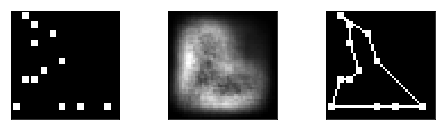

In [0]:
test(100)

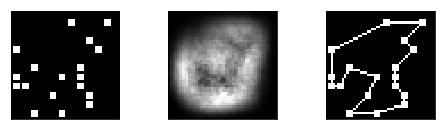

In [0]:
test(200)

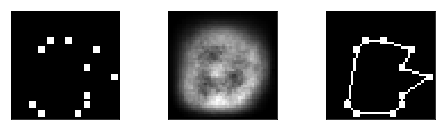

In [0]:
test(300)

# 優良エッジ値